Q1

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
from zipfile import ZipFile


# Specify the zip file path
zip_file_path = "/Users/dylanlam/Documents/GitHub/data_science_practice_and_skills/datasets/q4-data.csv.zip"


data_filepath = 'q4-data.csv'  # Assuming CSV file inside the zip

with ZipFile(zip_file_path, 'r') as zip_ref:
  # Get a list of file names within the zip
  file_names = zip_ref.namelist()


  # Read the specific CSV file from the zip
  with zip_ref.open("q4-data.csv") as csv_file:
    df = pd.read_csv(csv_file)  # No compression argument needed here

df.head()

,Feature1,Feature2,Label
0,-0.929528,-9.866809,0
1,-2.064504,-3.640057,1
2,-3.718791,-4.903395,2
3,-1.331214,-9.305812,0
4,-6.436536,0.336705,3


In [19]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

X = df[['Feature1', 'Feature2']]
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
silhouette_score = silhouette_score(X, labels)
print(silhouette_score)


0.805384903157843


/Users/dylanlam/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Since the Silhouette Score (0.81) is positive and close to 1, we are confident that the objects are clustered accurately and is clearly distinct from other clusters. Since the score isn't close to 0 or negative, we can be sure that the clustering done by this model is accurate for this data.

Q2

/Users/dylanlam/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dylanlam/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dylanlam/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dylanlam/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

Number of Clusters: 2 SSE: 6439.122196719902
Number of Clusters: 3 SSE: 1152.4397429815463
Number of Clusters: 4 SSE: 215.28586814501494
Number of Clusters: 5 SSE: 196.78411472830257
Number of Clusters: 6 SSE: 179.42184624496934
Number of Clusters: 7 SSE: 161.38865254441694
Number of Clusters: 8 SSE: 144.9419819518361


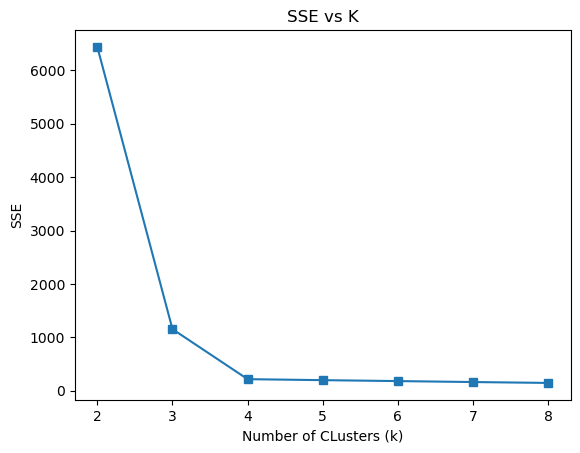

In [20]:
n_clusters = [2, 3, 4, 5, 6, 7, 8]
inertia_scores = []

for k in n_clusters:
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(X)
  sse = kmeans.inertia_
  inertia_scores.append(sse)

plt.plot(n_clusters, inertia_scores, marker='s')
plt.title('SSE vs K')
plt.ylabel('SSE')
plt.xlabel('Number of CLusters (k)')

for i in range(len(n_clusters)):
  print('Number of Clusters:', n_clusters[i], 'SSE:', inertia_scores[i])

The best K using the elbow method would be k=3 because that is the optimal point where there is a balance between number of clusters and SSE. I used the elbow method to determine this point as the optimal point as the rate of decrease in SSE after k=3 is minimal compared to the rate of decrease before k=3. This shows that increasing the number of clusters from 3 would result in negligble change in sse, and at the same time decrease the simplicity of this model.

Q3

In [15]:
from scipy.cluster.hierarchy import linkage,cophenet
from scipy.spatial.distance import pdist

distances = pdist(X)
link = linkage(distances, method='single')
cophenetic_distance = cophenet(link, distances)[0]

print("Cophenetic Correlation Distance:", cophenetic_distance)

Cophenetic Correlation Distance: 0.8618306643181229


The Cophenetic Correlation Distance (0.86) shows that there is a strong relationship between the distances in the observed points and distances in the predicted by hieracrchy clustering. In short, it shows that the hieracrhy sinkle linage model predicted the similar distances as found in the original data.

Q4

In [21]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score

y = np.array(df['Label'])
eps = [0.1, 0.25, 0.5, 1]
sizes = [2,4, 10, 20]
accuracies = []

for e in range(len(eps)):
  accuracies.append([])
  for m in range(len(sizes)):
    epsilon = eps[e]
    min_sam = sizes[m]
    db = DBSCAN(eps=epsilon, min_samples=min_sam)
    db.fit(X)
    pred_labels = db.labels_
    accuracy = accuracy_score(y, pred_labels)
    accuracies[e].append(accuracy)
    print('eps =', epsilon, '; min_samples =', min_sam, '; Accuracy:', accuracy)


eps = 0.1 ; min_samples = 2 ; Accuracy: 0.573
eps = 0.1 ; min_samples = 4 ; Accuracy: 0.383
eps = 0.1 ; min_samples = 10 ; Accuracy: 0.364
eps = 0.1 ; min_samples = 20 ; Accuracy: 0.0
eps = 0.25 ; min_samples = 2 ; Accuracy: 0.987
eps = 0.25 ; min_samples = 4 ; Accuracy: 0.985
eps = 0.25 ; min_samples = 10 ; Accuracy: 0.965
eps = 0.25 ; min_samples = 20 ; Accuracy: 0.919
eps = 0.5 ; min_samples = 2 ; Accuracy: 1.0
eps = 0.5 ; min_samples = 4 ; Accuracy: 1.0
eps = 0.5 ; min_samples = 10 ; Accuracy: 1.0
eps = 0.5 ; min_samples = 20 ; Accuracy: 0.999
eps = 1 ; min_samples = 2 ; Accuracy: 0.5
eps = 1 ; min_samples = 4 ; Accuracy: 0.5
eps = 1 ; min_samples = 10 ; Accuracy: 0.5
eps = 1 ; min_samples = 20 ; Accuracy: 0.5


The best model, based on the different combinations of parameters, is any DBSCAN model with eps=0.5. We changed the min_samples, and saw that the results were the approximately the same (accuracy of 1). We would choose the min_samples of 10 to account for the noise in such a large dataset. We would not choose min_samples value of 20 because it resulted in accuracy of 0.999, which is less than 1, even if slightly so.

An accuracy of 1, indicates that the dbscan model was able to perfectly assign points into their respective clusters. However, this might be an overfit model, so we need to test this model on differnt data to better understand if this model can accurately cluster unseen data.